<a href="https://colab.research.google.com/github/deny-joefakri/Coffee-Classification/blob/main/Mobile_net_Cofee_bean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(1234)

In [ ]:
image_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True)

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
from google.colab import drive  
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/AI/datasets/train/'

val_dir = '/content/drive/MyDrive/AI/datasets/val/'

test_dir = '/content/drive/MyDrive/AI/datasets/test/'

In [ ]:
training_set = image_generator.flow_from_directory(batch_size=4,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode="categorical")

validation_set = image_generator.flow_from_directory(batch_size=4,
                                                   directory=val_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode="categorical")

testing_set = image_generator.flow_from_directory(batch_size=4,
                                                   directory=test_dir,
                                                   shuffle=False,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode="categorical")

Found 4807 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [ ]:
training_set.samples

4807

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
mbn_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

mbn_model.add(pretrained_model)
mbn_model.add(Flatten())
mbn_model.add(Dense(512, activation='relu'))
mbn_model.add(Dense(4, activation='softmax'))

In [ ]:
mbn_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history_mbn = mbn_model.fit(training_set, epochs=25, validation_data=validation_set)

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [ ]:
mbn_model2 = Sequential()

resent_model = ResNet50V2(
    include_top=False, 
    weights='imagenet', 
    pooling='avg',classes=4,
    input_shape=(224,224,3))

for layer in resent_model.layers:
    layer.trainable = False

mbn_model2.add(resent_model)
mbn_model2.add(Flatten())
mbn_model2.add(Dense(512, activation='relu'))
mbn_model2.add(Dense(4, activation='softmax'))

# x = Conv2D(128, (3, 3), activation='relu')(resent_model.output)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(100,activation='relu')(x)
# x = Dense(6,activation='softmax')(x)

# model = Model(inputs=resent_model.input, outputs=x)


94668760/94668760 [==============================] - 0s 0us/step


In [ ]:
mbn_model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history_mbn = mbn_model2.fit(training_set, epochs=25, validation_data=validation_set)

Epoch 1/25
1202/1202 [==============================] - 1139s 939ms/step - loss: 0.8236 - accuracy: 0.6890 - val_loss: 0.7330 - val_accuracy: 0.7119
Epoch 2/25
1202/1202 [==============================] - 94s 78ms/step - loss: 0.5817 - accuracy: 0.7799 - val_loss: 0.8892 - val_accuracy: 0.6888
Epoch 3/25
1202/1202 [==============================] - 93s 77ms/step - loss: 0.5407 - accuracy: 0.7893 - val_loss: 0.6549 - val_accuracy: 0.7550
Epoch 4/25
1202/1202 [==============================] - 93s 77ms/step - loss: 0.4823 - accuracy: 0.8161 - val_loss: 0.5798 - val_accuracy: 0.7887
Epoch 5/25
1202/1202 [==============================] - 91s 76ms/step - loss: 0.4366 - accuracy: 0.8321 - val_loss: 0.6260 - val_accuracy: 0.7538
Epoch 6/25
1202/1202 [==============================] - 92s 77ms/step - loss: 0.4120 - accuracy: 0.8436 - val_loss: 0.6442 - val_accuracy: 0.7631
Epoch 7/25
1202/1202 [==============================] - 92s 76ms/step - loss: 0.3928 - accuracy: 0.8513 - val_loss: 0.508

In [ ]:
from keras.layers import GlobalAvgPool2D, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception

In [ ]:
# # Initialize Base Model
name = "ResNet50V2"
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model.trainable = False

# Model
resnet_50V2 = Sequential([
    base_model, 
    GlobalAvgPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])


# # Compile
resnet_50V2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint(name + ".h5", save_best_only=True)]


# Training
resnet_50V2.fit(training_set, validation_data=validation_set, epochs=50, callbacks=cbs)

94668760/94668760 [==============================] - 7s 0us/step
Epoch 1/50
  93/1202 [=>............................] - ETA: 54:45 - loss: 1.4805 - accuracy: 0.4758

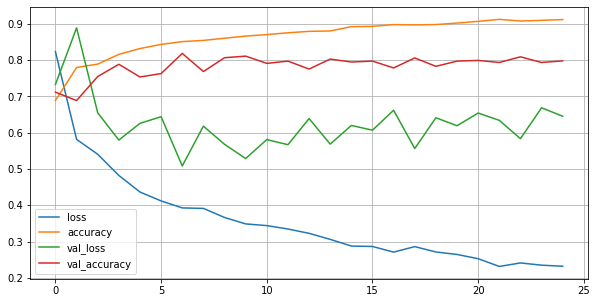

In [ ]:
pd.DataFrame(history_mbn.history).plot(figsize=(10, 5))
plt.grid(True)
plt.show()

In [ ]:
mbn_model.evaluate(testing_set)

400/400 [==============================] - 320s 801ms/step - loss: 0.6243 - accuracy: 0.8094


[0.6242701411247253, 0.809374988079071]

In [ ]:
mbn_model2.evaluate(testing_set)

400/400 [==============================] - 316s 791ms/step - loss: 0.6062 - accuracy: 0.8025


[0.6061659455299377, 0.8025000095367432]

In [ ]:
test_pred = np.argmax(mbn_model.predict(testing_set), axis=1)

400/400 [==============================] - 22s 52ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(testing_set.classes, test_pred))

[[279   4  80  37]
 [  6 338  38  18]
 [  7   0 373  20]
 [ 22   7  67 304]]
